In [1]:
from embed import embedding
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

For the example, let's use [Zachary's Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). It's a small social network of 34 individuals in a karate club. 

In [2]:
A = np.loadtxt('karate.txt') # adjacency matrix 
N = A.shape[0]

# The Embedding Object

First we need an embedding function. The embedding function can be any (Tensorflow) function that receives the latent coordinates as an $(N,d)$ array, and returns an adjacency matrix constructed from them. 

As a random choice, let's try the exponentiated negative distance squared between points:

$$ A_{ij} = \mathrm{exp}\left(- d(\mathbf{z}_i,\mathbf{z}_j)^2 \right)$$

We can learn a little bit about what this embedding does and what it can capture. 

In [3]:
def exp_dist_squared(Z):   
    
    Z = tf.cast(Z, tf.float32)
    
    Zsq = tf.reduce_sum(Z*Z, axis=1, keepdims=True)
    D = Zsq + tf.transpose(Zsq) - 2*tf.matmul(Z, tf.transpose(Z)) # distance squared between every pair of z's
    
    B = tf.math.exp(-(D))
    
    return B

Initialize a 2-dimensional embedding with the function we just defined. 

By default, it optimizes a least-square error, but you can specify another one with the `loss` Kwarg.

You can also specify a learning rate with `lr`, initial spread with `spread`. 

In [17]:
emb = embedding(N, 2, exp_dist_squared)

And fit it to the adjacency matrix.

You can specify whether it should ignore self-links with `zero_diag`, which is true by default. 

In [18]:
emb.fit(A,epochs = 500)

iteration 0: 428.0303039550781
iteration 100: 100.57173919677734
iteration 200: 97.74681091308594
iteration 300: 97.67887878417969
iteration 400: 97.6568603515625


# Visualizations

## Plotting the 2D layout

In [19]:
from visualize import plot_layout

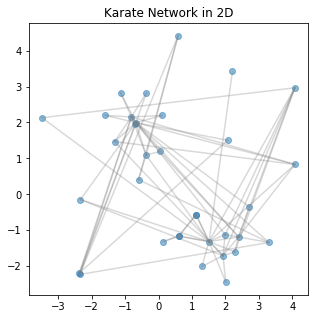

In [20]:
plot_layout(A,emb.Z,title='Karate Network in 2D')

## Plotting the comparison

In [21]:
from visualize import plot_comparison

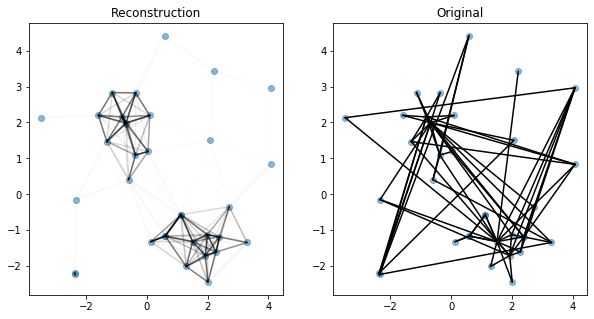

In [22]:
B = emb()
plot_comparison(A,B,emb.Z)

From this we learn that this embedding is great at capturing cliques, and pretty much nothing else.

## Plotting a 3D layout

In [4]:
from visualize import plot_layout3d

In [5]:
emb = embedding(N, 3, exp_dist_squared) 
emb.fit(A,epochs = 500)

iteration 0: 332.5765075683594
iteration 100: 98.86536407470703
iteration 200: 87.29833221435547
iteration 300: 81.9995346069336
iteration 400: 77.98345947265625


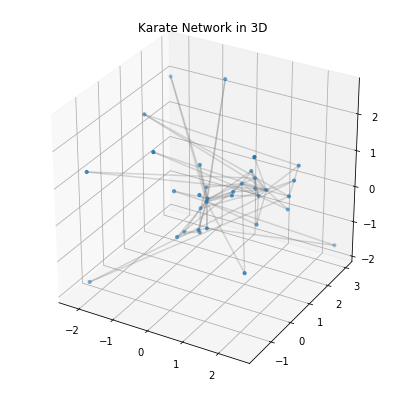

In [6]:
plot_layout3d(A,emb.Z, title='Karate Network in 3D')

In a jupyter notebook, running `%matplotlib qt` before creating the plot will draw it in a separate interactive window. 

# Bonus: save an animation

Requires celluloid

`pip install celluloid`

And tqdm for the progress bar. (It can take a while and it can be very daunting not having a progress bar)

`pip install tqdm`

This will save an mp4 file visualizing the optimization progress. 


In [6]:
from animate import animate

100%|██████████| 500/500 [28:51<00:00,  3.46s/it]


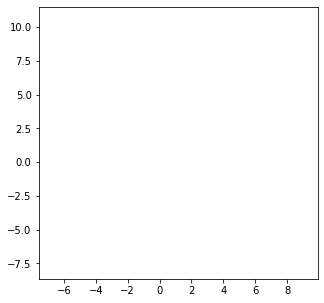

In [7]:
emb = embedding(N, 2, exp_dist_squared)
anim = animate(emb, A, 500)
anim.save('karate.mp4')